# Telco Customer Churn Data Preparation

## Loading Libraries and data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder #, OneHotEncoder
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', 500)

In [69]:
import pkg_resources
# list packages to be checked
root_packages = [
    'pandas', 'numpy', 'matplotlib', 'seaborn', 
    'plotly', 'sklearn', 'imblearn']
# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

seaborn==0.11.0
plotly==5.4.0
pandas==1.1.3
numpy==1.19.1
matplotlib==3.3.1


In [2]:
churn = pd.read_csv('data/Telco_customer_churn.csv')
churn_target = pd.read_csv('data/churn.csv')

In [3]:
# checking to see how many ID's match in both datasets
len(set(churn['CustomerID']).intersection(set(churn_target['customerID']))) 

7043

## Data Understanding

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   ReferredaFriend                    7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   PhoneService                       7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   MultipleLines                      7043 non-null   object 
 10  InternetService                    7043 non-null   object 
 11  InternetType                       7043 non-null   objec

In [5]:
churn_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn_target = churn_target.drop(churn_target.columns[[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]],axis=1,)

In [7]:
churn_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
 5   Churn          7043 non-null   object
dtypes: int64(1), object(5)
memory usage: 330.3+ KB


In [8]:
churn = pd.merge(churn, churn_target, left_on='CustomerID', right_on='customerID', how='left').drop('customerID', axis=1)


In [9]:
churn.shape

(7043, 35)

In [10]:
churn.head()

CustomerID  Count Quarter ReferredaFriend  Number of Referrals  \
0  8779-QRDMV      1      Q3              No                    0   
1  7495-OOKFY      1      Q3             Yes                    1   
2  1658-BYGOY      1      Q3              No                    0   
3  4598-XLKNJ      1      Q3             Yes                    1   
4  4846-WHAFZ      1      Q3             Yes                    1   

   Tenure in Months    Offer PhoneService  Avg Monthly Long Distance Charges  \
0                 1     None           No                               0.00   
1                 8  Offer E          Yes                              48.85   
2                18  Offer D          Yes                              11.33   
3                25  Offer C          Yes                              19.76   
4                37  Offer C          Yes                               6.33   

  MultipleLines InternetService InternetType  Avg Monthly GB Download  \
0            No             Yes          DSL                        8   
1           Yes             Yes  Fiber Optic                       17   
2           Yes             Yes  Fiber Optic                       52   
3            No             Yes  Fiber Optic                       12   
4           Yes             Yes  Fiber Optic                       14   

  OnlineSecurity OnlineBackup DeviceProtectionPlan PremiumTechSupport  \
0             No           No                  Yes                 No   
1             No          Yes                   No                 No   
2             No           No                   No                 No   
3             No          Yes                  Yes                 No   
4             No           No                   No                 No   

  StreamingTV StreamingMovies StreamingMusic UnlimitedData        Contract  \
0          No             Yes             No            No  Month-to-Month   
1          No              No             No           Yes  Month-to-Month   
2         Yes             Yes            Yes           Yes  Month-to-Month   
3         Yes             Yes             No           Yes  Month-to-Month   
4          No              No             No           Yes  Month-to-Month   

  PaperlessBilling    PaymentMethod  Monthly Charge  Total Charges  \
0              Yes  Bank Withdrawal           39.65          39.65   
1              Yes      Credit Card           80.65         633.30   
2              Yes  Bank Withdrawal           95.45        1752.55   
3              Yes  Bank Withdrawal           98.50        2514.50   
4              Yes  Bank Withdrawal           76.50        2868.15   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                        20                         0.00   
1           0.00                         0                       390.80   
2          45.61                         0                       203.94   
3          13.43                         0                       494.00   
4           0.00                         0                       234.21   

   Total Revenue  gender  SeniorCitizen Partner Dependents Churn  
0          59.65    Male              1      No         No   Yes  
1        1024.10  Female              1     Yes         No   Yes  
2        1910.88    Male              1      No         No   Yes  
3        2995.07  Female              1     Yes         No   Yes  
4        3102.36  Female              1     Yes         No   Yes

In [11]:
churn.T.apply(lambda x: x.unique(), axis=1)

CustomerID                           [8779-QRDMV, 7495-OOKFY, 1658-BYGOY, 4598-XLKN...
Count                                                                              [1]
Quarter                                                                           [Q3]
ReferredaFriend                                                              [No, Yes]
Number of Referrals                             [0, 1, 6, 2, 4, 3, 7, 5, 8, 9, 10, 11]
Tenure in Months                     [1, 8, 18, 25, 37, 27, 58, 15, 7, 11, 3, 13, 1...
Offer                                [None, Offer E, Offer D, Offer C, Offer B, Off...
PhoneService                                                                 [No, Yes]
Avg Monthly Long Distance Charges    [0.0, 48.85, 11.33, 19.76, 6.33, 3.33, 15.28, ...
MultipleLines                                                                [No, Yes]
InternetService                                                              [Yes, No]
InternetType                               

#### Null values

In [12]:
# drop customerID as we won't be using it in our analysis
# drop Quarter as it has only one unique value (Q3)
churn = churn.drop(columns = ['CustomerID','Quarter', 'Count'], axis=1)

In [13]:
churn.isnull().sum()

ReferredaFriend                      0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
PhoneService                         0
Avg Monthly Long Distance Charges    0
MultipleLines                        0
InternetService                      0
InternetType                         0
Avg Monthly GB Download              0
OnlineSecurity                       0
OnlineBackup                         0
DeviceProtectionPlan                 0
PremiumTechSupport                   0
StreamingTV                          0
StreamingMovies                      0
StreamingMusic                       0
UnlimitedData                        0
Contract                             0
PaperlessBilling                     0
PaymentMethod                        0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charg

#### Categorical columns

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ReferredaFriend                    7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   PhoneService                       7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   MultipleLines                      7043 non-null   object 
 7   InternetService                    7043 non-null   object 
 8   InternetType                       7043 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  OnlineSecurity                     7043 non-null   object 
 11  OnlineBackup                       7043 non-null   objec

In [15]:
churn["SeniorCitizen"]= churn["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [16]:
objects = churn.loc[:, churn.dtypes == np.object]
categorical = list(objects.columns)
churn[categorical].head()

ReferredaFriend    Offer PhoneService MultipleLines InternetService  \
0              No     None           No            No             Yes   
1             Yes  Offer E          Yes           Yes             Yes   
2              No  Offer D          Yes           Yes             Yes   
3             Yes  Offer C          Yes            No             Yes   
4             Yes  Offer C          Yes           Yes             Yes   

  InternetType OnlineSecurity OnlineBackup DeviceProtectionPlan  \
0          DSL             No           No                  Yes   
1  Fiber Optic             No          Yes                   No   
2  Fiber Optic             No           No                   No   
3  Fiber Optic             No          Yes                  Yes   
4  Fiber Optic             No           No                   No   

  PremiumTechSupport StreamingTV StreamingMovies StreamingMusic UnlimitedData  \
0                 No          No             Yes             No            No   
1                 No          No              No             No           Yes   
2                 No         Yes             Yes            Yes           Yes   
3                 No         Yes             Yes             No           Yes   
4                 No          No              No             No           Yes   

         Contract PaperlessBilling    PaymentMethod  gender SeniorCitizen  \
0  Month-to-Month              Yes  Bank Withdrawal    Male           Yes   
1  Month-to-Month              Yes      Credit Card  Female           Yes   
2  Month-to-Month              Yes  Bank Withdrawal    Male           Yes   
3  Month-to-Month              Yes  Bank Withdrawal  Female           Yes   
4  Month-to-Month              Yes  Bank Withdrawal  Female           Yes   

  Partner Dependents Churn  
0      No         No   Yes  
1     Yes         No   Yes  
2      No         No   Yes  
3     Yes         No   Yes  
4     Yes         No   Yes

In [17]:
churn[categorical].T.apply(lambda x: x.unique(), axis=1)

ReferredaFriend                                                 [No, Yes]
Offer                   [None, Offer E, Offer D, Offer C, Offer B, Off...
PhoneService                                                    [No, Yes]
MultipleLines                                                   [No, Yes]
InternetService                                                 [Yes, No]
InternetType                              [DSL, Fiber Optic, Cable, None]
OnlineSecurity                                                  [No, Yes]
OnlineBackup                                                    [No, Yes]
DeviceProtectionPlan                                            [Yes, No]
PremiumTechSupport                                              [No, Yes]
StreamingTV                                                     [No, Yes]
StreamingMovies                                                 [Yes, No]
StreamingMusic                                                  [No, Yes]
UnlimitedData                         

In [18]:
churn[categorical].T.apply(lambda x: x.nunique(), axis=1)

ReferredaFriend         2
Offer                   6
PhoneService            2
MultipleLines           2
InternetService         2
InternetType            4
OnlineSecurity          2
OnlineBackup            2
DeviceProtectionPlan    2
PremiumTechSupport      2
StreamingTV             2
StreamingMovies         2
StreamingMusic          2
UnlimitedData           2
Contract                3
PaperlessBilling        2
PaymentMethod           3
gender                  2
SeniorCitizen           2
Partner                 2
Dependents              2
Churn                   2
dtype: int64

This dataset has 22 categorical features:

 - 18 binary features (Yes/No)
 - two features with three unique values each (categories)
 - one feature with four unique values (categories)
 - one feature with six unique values
 - last column [Churn] is the target variable

In [19]:
churn['Offer'].value_counts()

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

#### Numerical columns

In [20]:
dtypenum = ['int64', 'float64']
nums = churn.select_dtypes(include=dtypenum)
numerical = list(nums.columns)
churn[numerical].describe()

Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        64.761692    2280.381264       1.962182                  6.860713   
std         30.090047    2266.220462       7.902614                 25.104978   
min         18.250000      18.800000       0.000000                  0.000000   
25%         35.500000     400.150000       0.000000                  0.000000   
50%         70.350000    1394.550000       0.000000                  0.000000   
75%         89.850000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [21]:
churn = churn.rename(columns={'Avg Monthly Long Distance Charges': 'AvLongDistCharges', 
                              'Monthly Charge': 'MonthlyCharges', 
                              'Total Charges': 'TotalCharges',
                              'Total Refunds': 'TotalRefunds', 
                              'Total Long Distance Charges': 'TotalLongDistCharges',
                              'Total Revenue': 'TotalRevenue',
                              'Number of Referrals': 'NumberofReferrals', 
                              'Tenure in Months': 'Tenure',
                              'Avg Monthly GB Download':'AvgGBdownload',
                              'Total Extra Data Charges': 'TotalExtraDataCharges'})

In [22]:
nums = churn.select_dtypes(include=dtypenum)
numerical = list(nums.columns)
churn[numerical].describe()

NumberofReferrals       Tenure  AvLongDistCharges  AvgGBdownload  \
count        7043.000000  7043.000000        7043.000000    7043.000000   
mean            1.951867    32.386767          22.958954      20.515405   
std             3.001199    24.542061          15.448113      20.418940   
min             0.000000     1.000000           0.000000       0.000000   
25%             0.000000     9.000000           9.210000       3.000000   
50%             0.000000    29.000000          22.890000      17.000000   
75%             3.000000    55.000000          36.395000      27.000000   
max            11.000000    72.000000          49.990000      85.000000   

       MonthlyCharges  TotalCharges  TotalRefunds  TotalExtraDataCharges  \
count     7043.000000   7043.000000   7043.000000            7043.000000   
mean        64.761692   2280.381264      1.962182               6.860713   
std         30.090047   2266.220462      7.902614              25.104978   
min         18.250000     18.800000      0.000000               0.000000   
25%         35.500000    400.150000      0.000000               0.000000   
50%         70.350000   1394.550000      0.000000               0.000000   
75%         89.850000   3786.600000      0.000000               0.000000   
max        118.750000   8684.800000     49.790000             150.000000   

       TotalLongDistCharges  TotalRevenue  
count           7043.000000   7043.000000  
mean             749.099262   3034.379056  
std              846.660055   2865.204542  
min                0.000000     21.360000  
25%               70.545000    605.610000  
50%              401.440000   2108.640000  
75%             1191.100000   4801.145000  
max             3564.720000  11979.340000

### Data Visualization

#### Categorical features

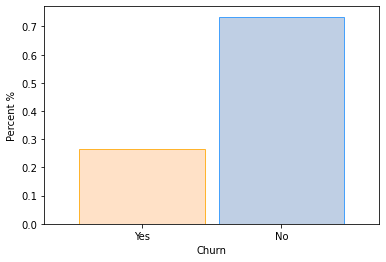

In [23]:
# Response variable
# plt.figure(figsize=(3, 4))
churn.Churn.value_counts(normalize=True).sort_values().plot(kind = 'bar', 
                                                            color = ['peachpuff', 'lightsteelblue'],
                                                            edgecolor = ['orange', 'dodgerblue'],
                                                            linewidth = 1,
                                                            width=0.9, 
                                                            alpha = 0.8)
plt.xlabel('Churn')
plt.xticks(rotation=0)
plt.ylabel('Percent %')
plt.show()
# fig = px.histogram(churn, x='Churn', histnorm='percent')
# fig.update_layout(width=300, height=400, bargap=0.1) 
# fig.show()

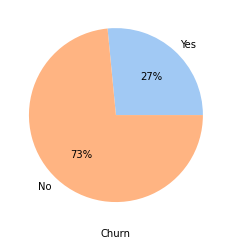

In [24]:
labels = ['Yes', 'No']
d = churn.Churn.value_counts(normalize=True).sort_values()
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(d, labels = labels, colors = colors, autopct='%.0f%%')
plt.xlabel('Churn')
plt.show()

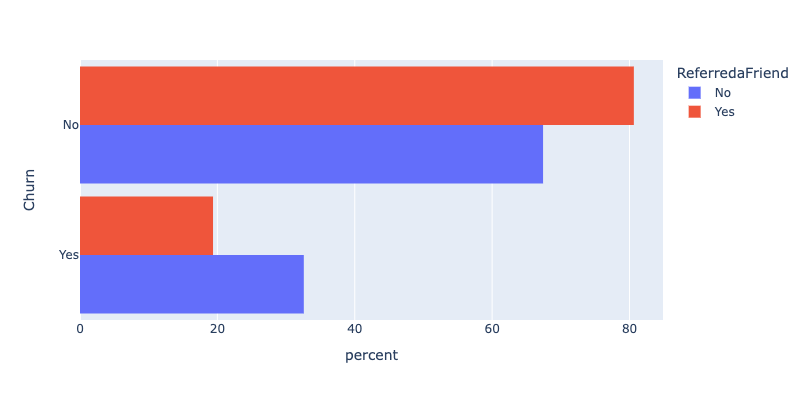

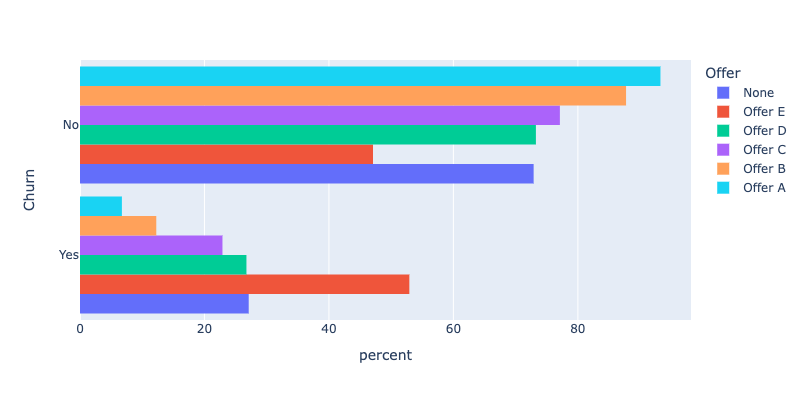

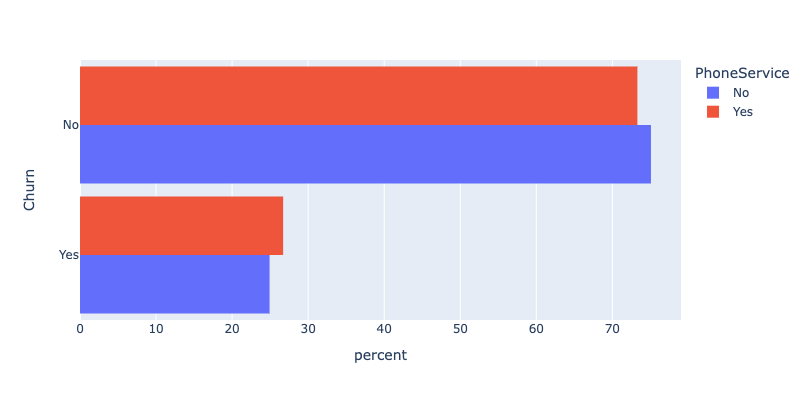

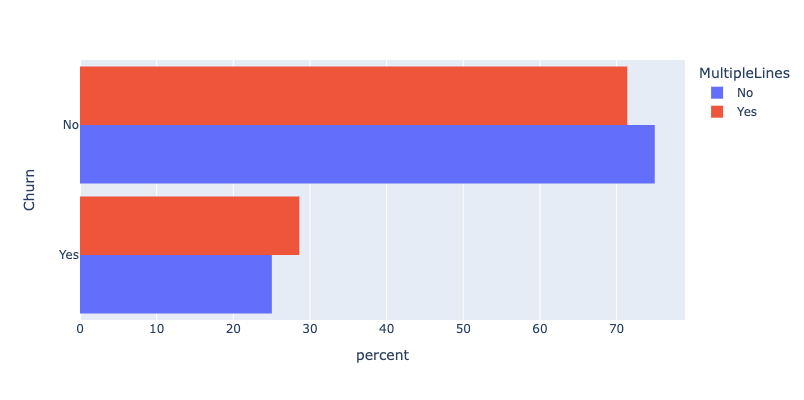

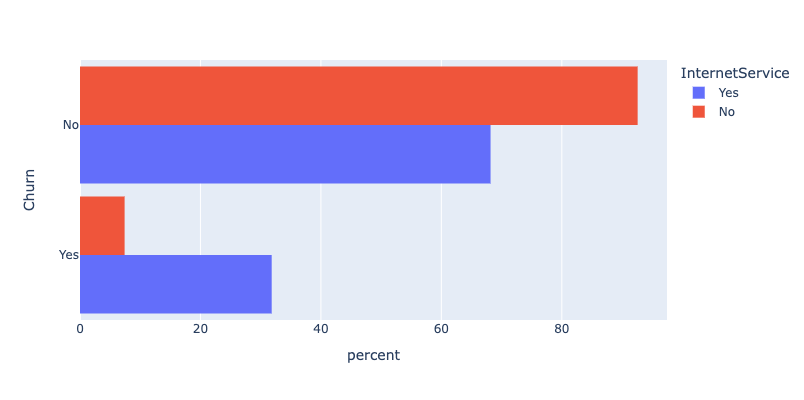

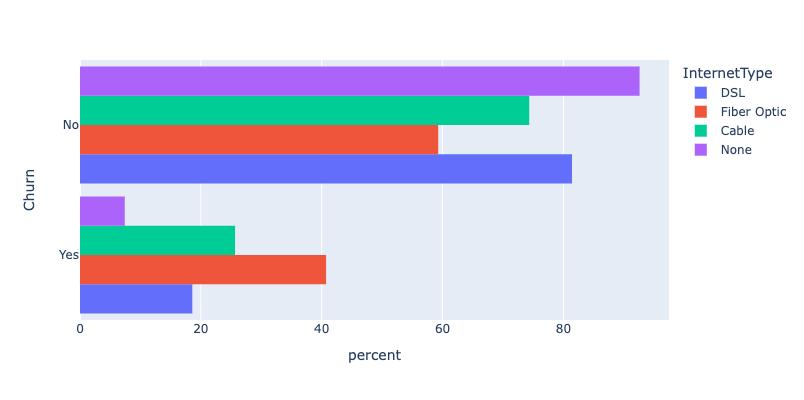

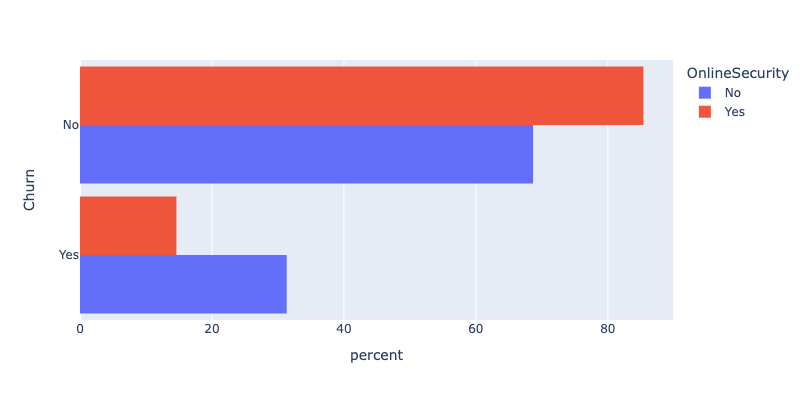

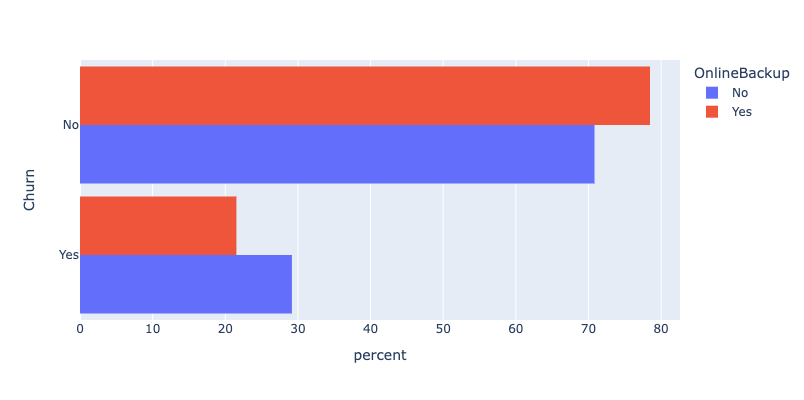

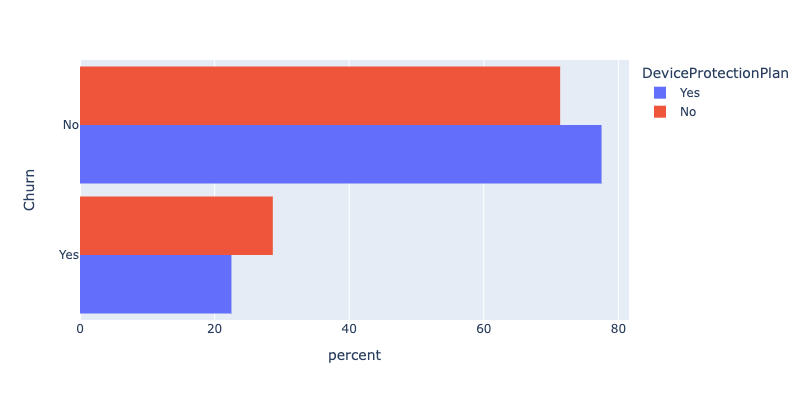

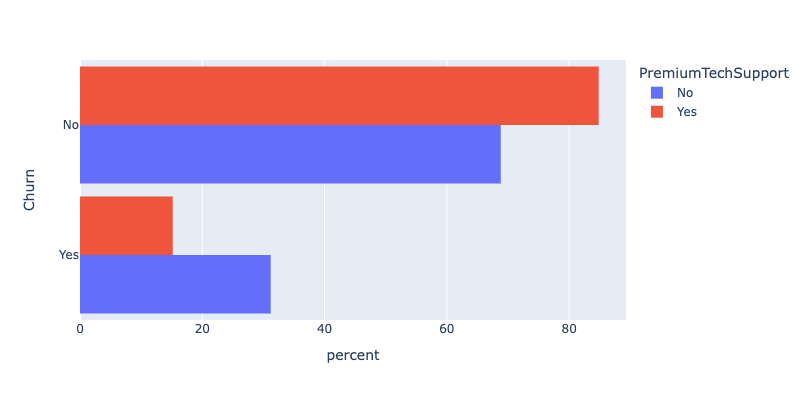

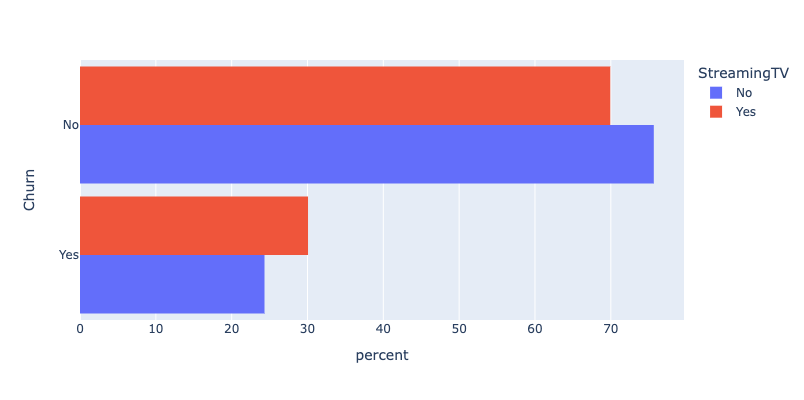

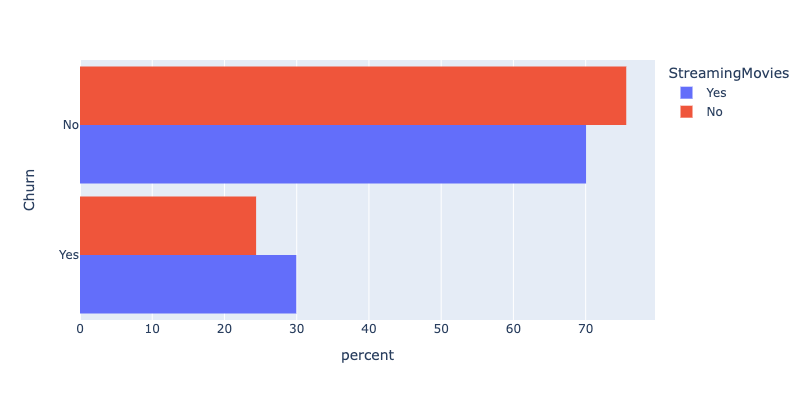

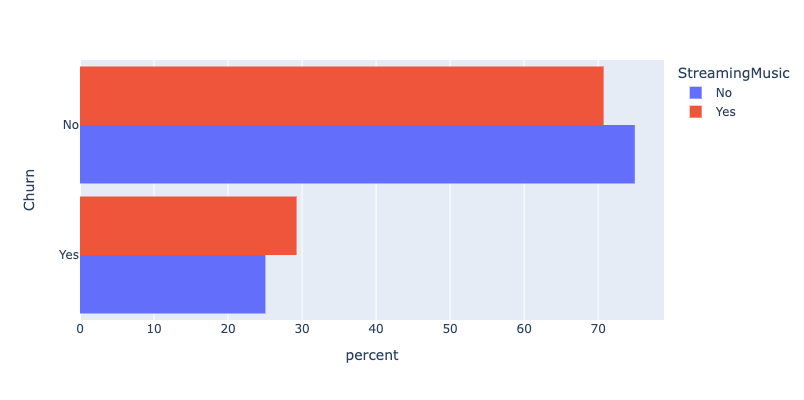

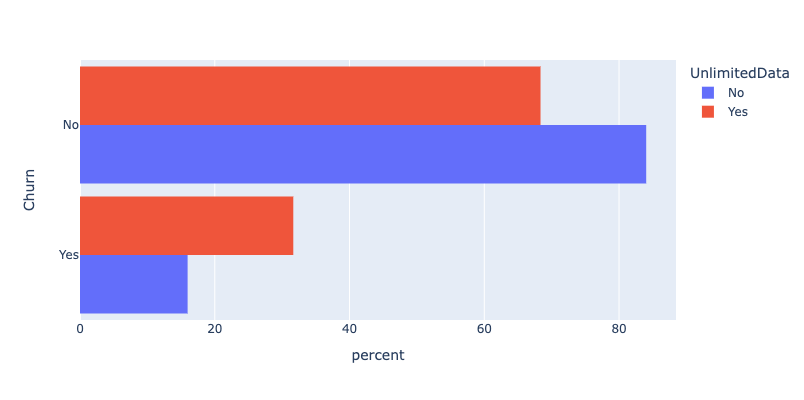

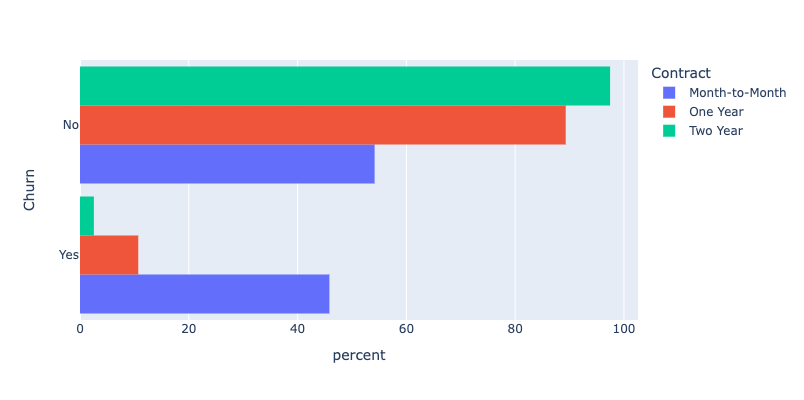

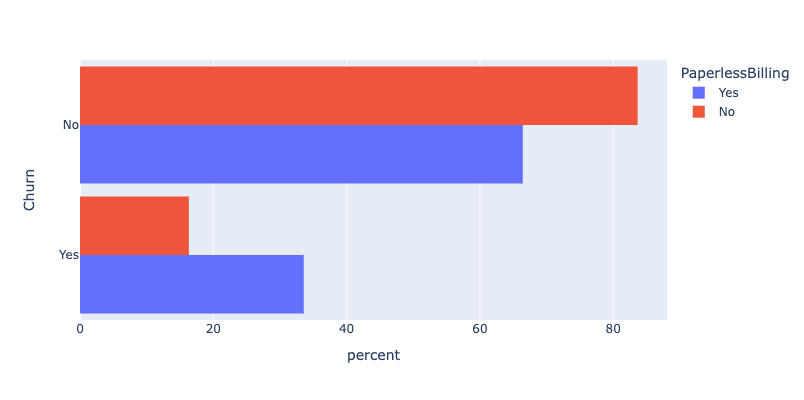

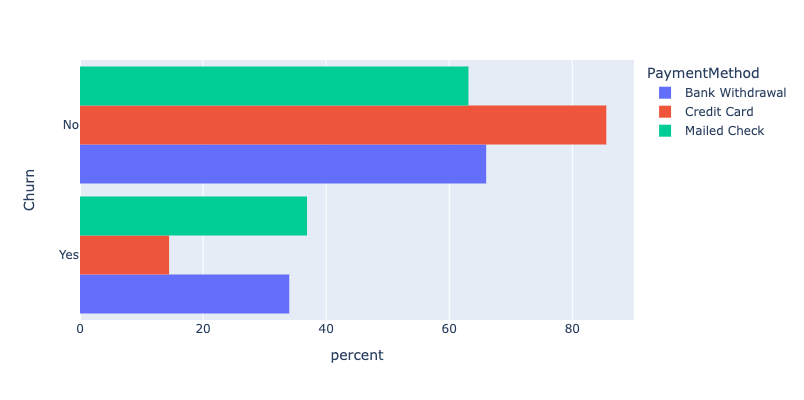

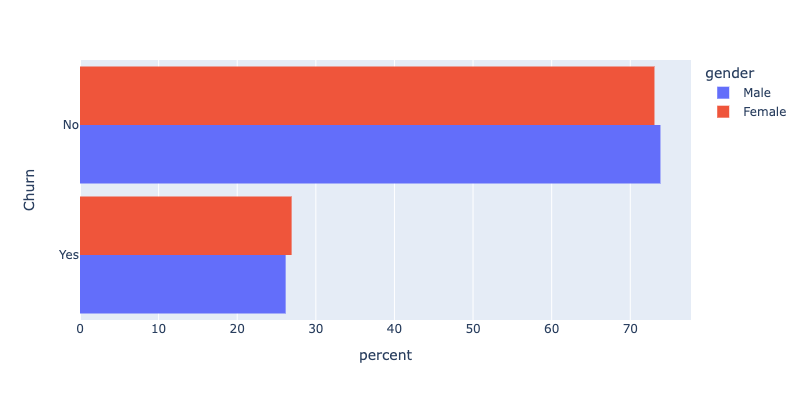

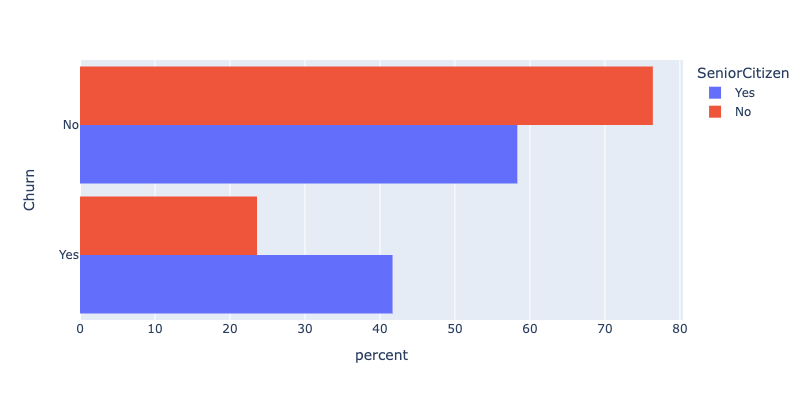

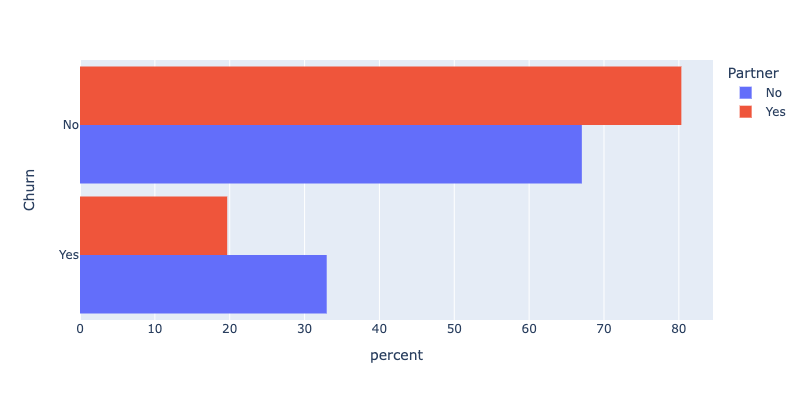

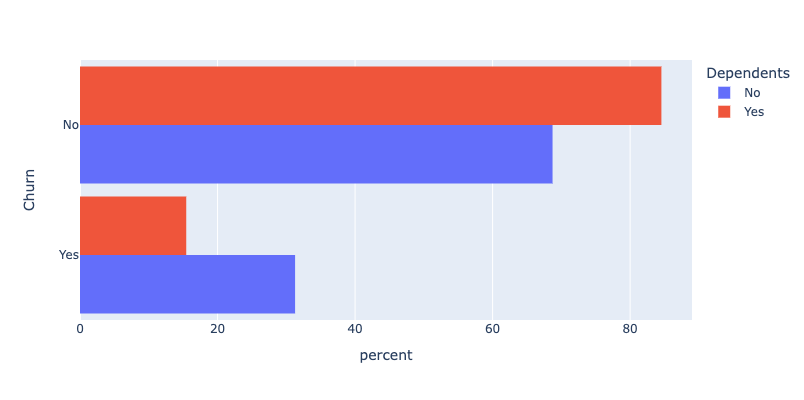

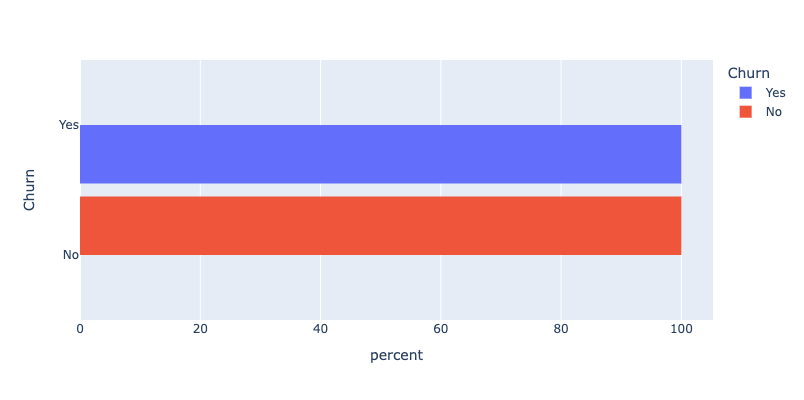

In [25]:
for cat in categorical: 
    fig = px.histogram(churn, y='Churn', color=cat, barmode='group', histnorm='percent')
    fig.update_layout(width=600, height=400, bargap=0.1) 
    fig.show()

Looking at the plots above we can deduce the following: 
- Gender is not an indicative of churn.
- SeniorCitizens have a much higher churn rate: 42% against 23% for non-senior customers, even though they are the minority amongst customer groups.
- Customers that don't have dependants and/or partners are more likely to churn
- Customers with multiple lines have a slightly higher churn rate, other than that, this categorical variable is not indicative of the churn.
- Clients without internet have a very low churn rate, and those with fiber are more probable to churn than those with DSL connection
- Customers with "Online Security", "Tech Support" and "Device Protection" are less likely to churn
- Streaming service is not predictive for churn
- Customers with paperless billing are more likely to churn
- Short term contracts have higher churn rates
- Electronic payment method has a very high churn rate


In [26]:
churn['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

#### Numerical Features

In [27]:
churn[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NumberofReferrals      7043 non-null   int64  
 1   Tenure                 7043 non-null   int64  
 2   AvLongDistCharges      7043 non-null   float64
 3   AvgGBdownload          7043 non-null   int64  
 4   MonthlyCharges         7043 non-null   float64
 5   TotalCharges           7043 non-null   float64
 6   TotalRefunds           7043 non-null   float64
 7   TotalExtraDataCharges  7043 non-null   int64  
 8   TotalLongDistCharges   7043 non-null   float64
 9   TotalRevenue           7043 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 605.3 KB


<AxesSubplot:xlabel='NumberofReferrals', ylabel='Churn'>

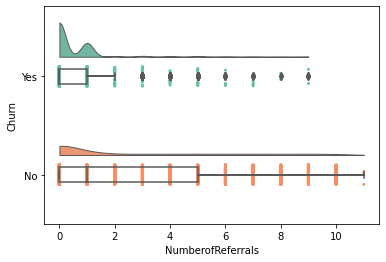

In [28]:
import ptitprince
ptitprince.RainCloud(data = churn, x = 'Churn', y = 'NumberofReferrals', orient = 'h')

<AxesSubplot:xlabel='AvLongDistCharges', ylabel='Churn'>

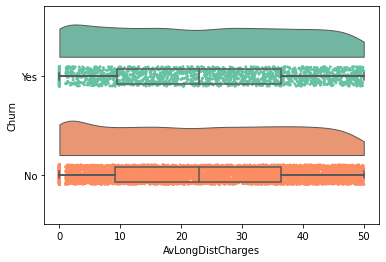

In [29]:
ptitprince.RainCloud(data = churn, x = 'Churn', y = 'AvLongDistCharges', orient = 'h')

<AxesSubplot:xlabel='AvgGBdownload', ylabel='Churn'>

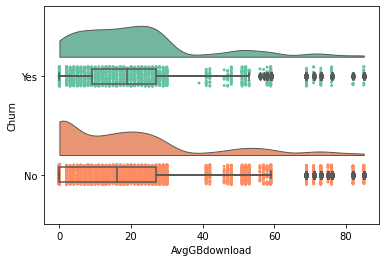

In [30]:
ptitprince.RainCloud(data = churn, x = 'Churn', y = 'AvgGBdownload', orient = 'h')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

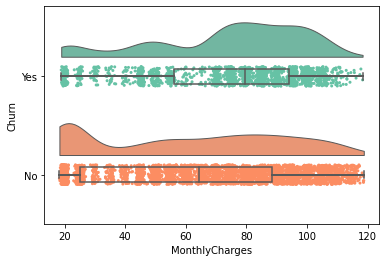

In [31]:
ptitprince.RainCloud(data = churn, x = 'Churn', y = 'MonthlyCharges', orient = 'h')

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

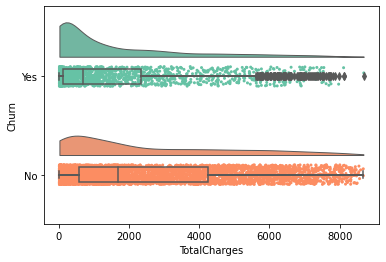

In [32]:
ptitprince.RainCloud(data = churn, x = 'Churn', y = 'TotalCharges', orient = 'h')


<AxesSubplot:xlabel='TotalRefunds', ylabel='Churn'>

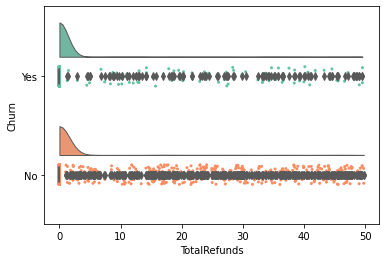

In [33]:
ptitprince.RainCloud(data = churn, x = 'Churn', y = 'TotalRefunds', orient = 'h')

<AxesSubplot:xlabel='TotalExtraDataCharges', ylabel='Churn'>

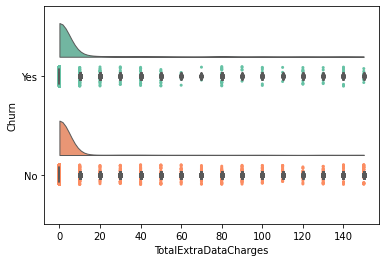

In [34]:
ptitprince.RainCloud(data = churn, x = 'Churn', y = 'TotalExtraDataCharges', orient = 'h')

<AxesSubplot:xlabel='TotalLongDistCharges', ylabel='Churn'>

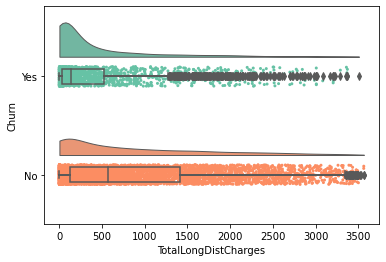

In [35]:
ptitprince.RainCloud(data = churn, x = 'Churn', y = 'TotalLongDistCharges', orient = 'h')

<AxesSubplot:xlabel='TotalRevenue', ylabel='Churn'>

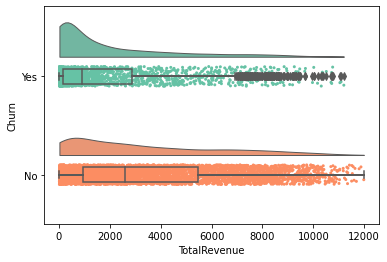

In [36]:
ptitprince.RainCloud(data = churn, x = 'Churn', y = 'TotalRevenue', orient = 'h')

##### Monthly Charges

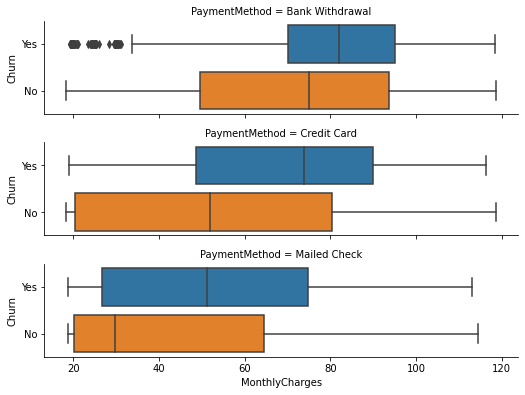

In [37]:
# numerical data - "Monthly Charges"
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=churn, height=1.8, aspect=4, orient='h')

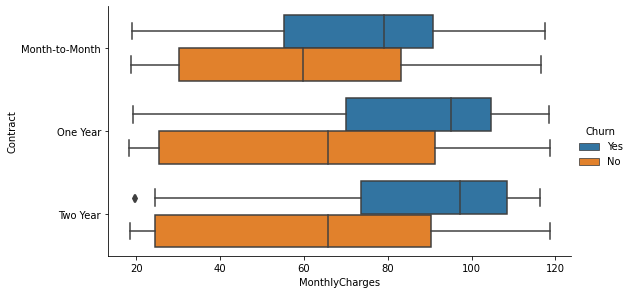

In [38]:
ax = sns.catplot(y="Contract", x="MonthlyCharges", hue="Churn", kind="box", data=churn, height=4, aspect=2, orient='h')

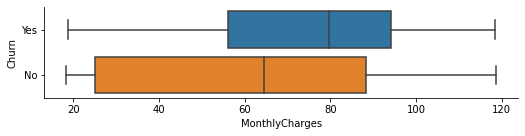

In [39]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", kind="box", data=churn, height=1.8, aspect=4, orient='h')

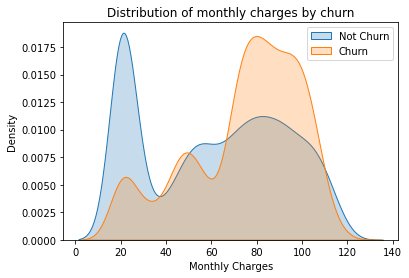

In [40]:
ax = sns.kdeplot(churn.MonthlyCharges[(churn["Churn"] == 'No') ],
                shade = True);
ax = sns.kdeplot(churn.MonthlyCharges[(churn["Churn"] == 'Yes') ],
                ax =ax, shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

- Longer contracts are more affected by higher monthly charges (for churn rate).
- Mailed checks have lower charges
-  Customers who have churned, have high monthly charges. The median is above 75.

##### Total Charges

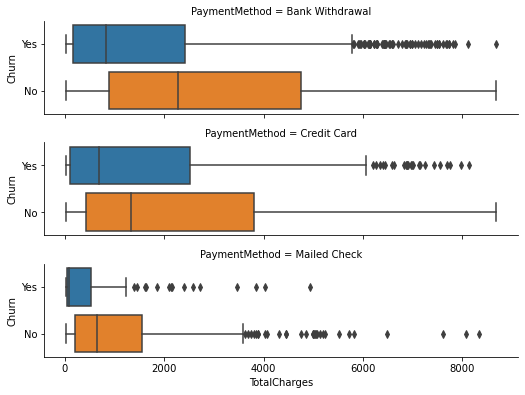

In [41]:
# numerical data - "Total Charges"
ax = sns.catplot(y="Churn", x="TotalCharges", row="PaymentMethod", kind="box", data=churn, height=1.8, aspect=4, orient='h')

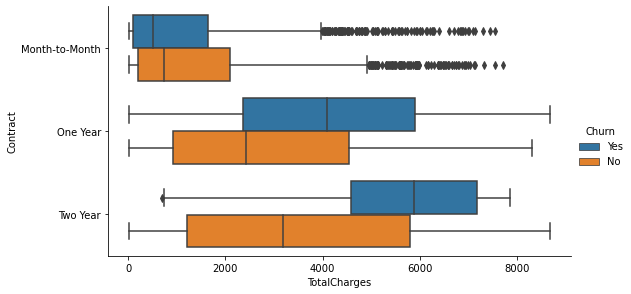

In [42]:
ax = sns.catplot(y="Contract", x="TotalCharges", hue="Churn", kind="box", data=churn, height=4, aspect=2, orient='h')

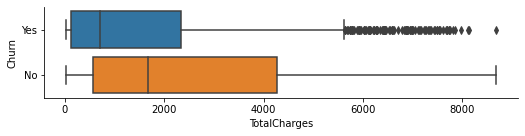

In [43]:
ax = sns.catplot(y="Churn", x="TotalCharges", kind="box", data=churn, height=1.8, aspect=4, orient='h')

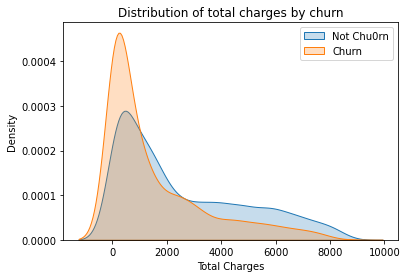

In [44]:
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'No') ],
                shade = True);
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'Yes') ],
                ax =ax, shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

- There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check
- Total charges for long contracts are higher even though they are less likely to churn
- The median Total charges of customers who have churned is low.

##### Tenure

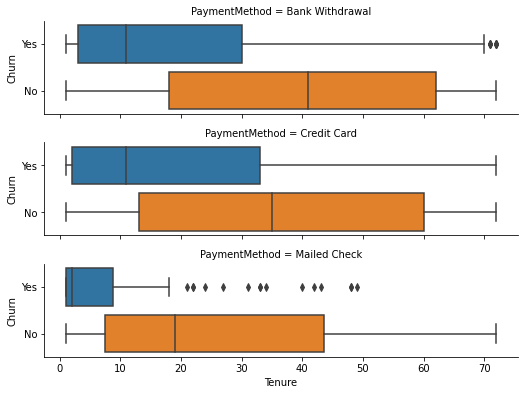

In [45]:
# numerical data - "Total Charges"
ax = sns.catplot(y="Churn", x="Tenure", row="PaymentMethod", kind="box", data=churn, height=1.8, aspect=4, orient='h')

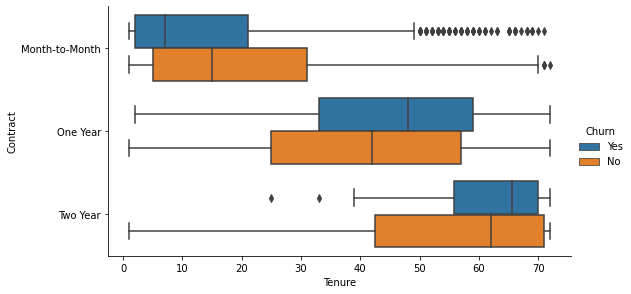

In [46]:
ax = sns.catplot(y="Contract", x="Tenure", hue="Churn", kind="box", data=churn, height=4, aspect=2, orient='h')

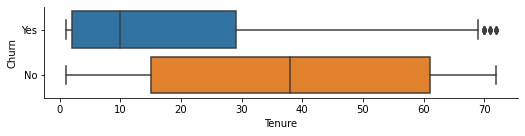

In [47]:
ax = sns.catplot(y="Churn", x="Tenure", kind="box", data=churn, height=1.8, aspect=4, orient='h')

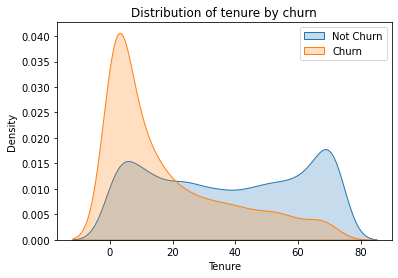

In [48]:
ax = sns.kdeplot(churn.Tenure[(churn["Churn"] == 'No') ],
                shade = True);
ax = sns.kdeplot(churn.Tenure[(churn["Churn"] == 'Yes') ],
                ax =ax, shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of tenure by churn');

- new customers are more likely to churn
- new customers are more likely to prefer towards electronic payments
- customers with high tenure are more likely to prefer long-term contracts
- maximum number of customers have a tenure of either 0-1 years and followed by 5-6 years.

### Feature Engineering

##### Categorical features

Encode categorical features

In [49]:
# get dummies for categorical variable with more than 2 categories
dummies = ['Offer', 'InternetType', 'Contract', 'PaymentMethod']
churn = pd.concat([churn, pd.get_dummies(churn[dummies]).astype(np.int64)], axis=1); 
churn = churn.drop(dummies, axis=1)

In [50]:
encode_cats = ['ReferredaFriend','PhoneService','MultipleLines','InternetService',
               'OnlineSecurity', 'OnlineBackup','DeviceProtectionPlan','PremiumTechSupport',
               'StreamingTV','StreamingMovies','StreamingMusic','UnlimitedData',
               'PaperlessBilling','gender','SeniorCitizen','Partner','Dependents', 'Churn']
le = LabelEncoder()
churn[encode_cats] = churn[encode_cats].apply(lambda col: le.fit_transform(col))   
churn[encode_cats].T.apply(lambda x: x.unique(), axis=1)

ReferredaFriend         [0, 1]
PhoneService            [0, 1]
MultipleLines           [0, 1]
InternetService         [1, 0]
OnlineSecurity          [0, 1]
OnlineBackup            [0, 1]
DeviceProtectionPlan    [1, 0]
PremiumTechSupport      [0, 1]
StreamingTV             [0, 1]
StreamingMovies         [1, 0]
StreamingMusic          [0, 1]
UnlimitedData           [0, 1]
PaperlessBilling        [1, 0]
gender                  [1, 0]
SeniorCitizen           [1, 0]
Partner                 [0, 1]
Dependents              [0, 1]
Churn                   [1, 0]
dtype: object

##### Numerical Features

In [51]:
# standarizing numeric features
churn[numerical] = pd.DataFrame(StandardScaler().fit_transform(churn[numerical].astype('float64')),columns=numerical)


In [52]:
# Move target variable to the last position in the dataframe
churn = churn[[c for c in churn if c not in ['Churn']] + ['Churn']]

In [53]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ReferredaFriend                7043 non-null   int64  
 1   NumberofReferrals              7043 non-null   float64
 2   Tenure                         7043 non-null   float64
 3   PhoneService                   7043 non-null   int64  
 4   AvLongDistCharges              7043 non-null   float64
 5   MultipleLines                  7043 non-null   int64  
 6   InternetService                7043 non-null   int64  
 7   AvgGBdownload                  7043 non-null   float64
 8   OnlineSecurity                 7043 non-null   int64  
 9   OnlineBackup                   7043 non-null   int64  
 10  DeviceProtectionPlan           7043 non-null   int64  
 11  PremiumTechSupport             7043 non-null   int64  
 12  StreamingTV                    7043 non-null   i

### Final Look

In [54]:
# format columns names for Matlab readability
churn.columns = churn.columns.str.replace(' ', '')
churn.columns = churn.columns.str.replace('_', '')
churn.head()

ReferredaFriend  NumberofReferrals    Tenure  PhoneService  \
0                0          -0.650409 -1.278988             0   
1                1          -0.317185 -0.993743             1   
2                0          -0.650409 -0.586250             1   
3                1          -0.317185 -0.301005             1   
4                1          -0.317185  0.187986             1   

   AvLongDistCharges  MultipleLines  InternetService  AvgGBdownload  \
0          -1.486303              0                1      -0.612975   
1           1.676120              1                1      -0.172176   
2          -0.752828              1                1       1.542040   
3          -0.207092              0                1      -0.417064   
4          -1.076516              1                1      -0.319109   

   OnlineSecurity  OnlineBackup  DeviceProtectionPlan  PremiumTechSupport  \
0               0             0                     1                   0   
1               0             1                     0                   0   
2               0             0                     0                   0   
3               0             1                     1                   0   
4               0             0                     0                   0   

   StreamingTV  StreamingMovies  StreamingMusic  UnlimitedData  \
0            0                1               0              0   
1            0                0               0              1   
2            1                1               1              1   
3            1                1               0              1   
4            0                0               0              1   

   PaperlessBilling  MonthlyCharges  TotalCharges  TotalRefunds  \
0                 1       -0.834611     -0.988823     -0.248313   
1                 1        0.528063     -0.726848     -0.248313   
2                 1        1.019955     -0.232929      5.523605   
3                 1        1.121324      0.103315      1.451245   
4                 1        0.390134      0.259379     -0.248313   

   TotalExtraDataCharges  TotalLongDistCharges  TotalRevenue  gender  \
0               0.523411             -0.884833     -1.038299       1   
1              -0.273300             -0.423221     -0.701668       0   
2              -0.273300             -0.643940     -0.392146       1   
3              -0.273300             -0.301322     -0.013720       0   
4              -0.273300             -0.608185      0.023728       0   

   SeniorCitizen  Partner  Dependents  OfferNone  OfferOfferA  OfferOfferB  \
0              1        0           0          1            0            0   
1              1        1           0          0            0            0   
2              1        0           0          0            0            0   
3              1        1           0          0            0            0   
4              1        1           0          0            0            0   

   OfferOfferC  OfferOfferD  OfferOfferE  InternetTypeCable  InternetTypeDSL  \
0            0            0            0                  0                1   
1            0            0            1                  0                0   
2            0            1            0                  0                0   
3            1            0            0                  0                0   
4            1            0            0                  0                0   

   InternetTypeFiberOptic  InternetTypeNone  ContractMonth-to-Month  \
0                       0                 0                       1   
1                       1                 0                       1   
2                       1                 0                       1   
3                       1                 0                       1   
4                       1                 0                       1   

   ContractOneYear  ContractTwoYear  PaymentMethodBankWithdrawal  \
0                0                0         

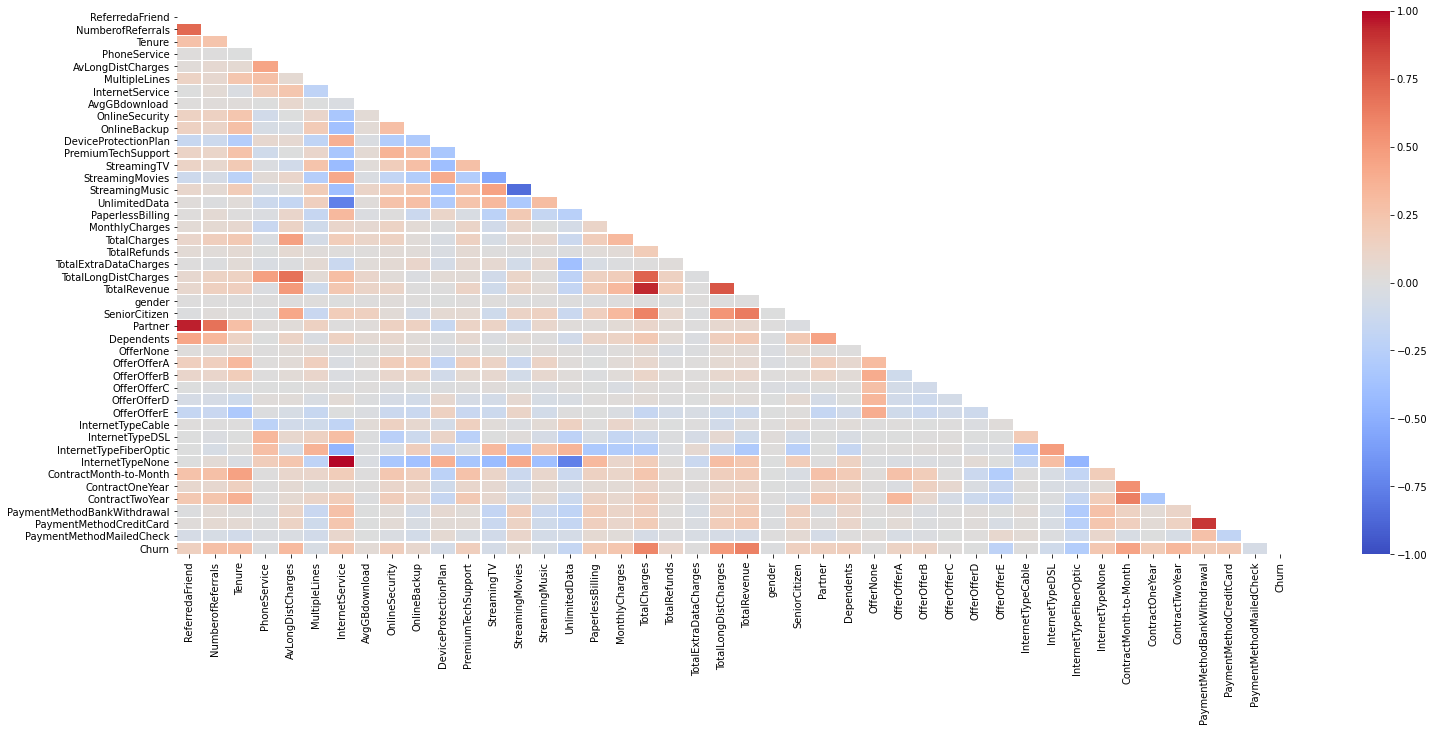

In [55]:
plt.figure(figsize=(25, 10))
corr = churn.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corrmatrix = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, 
                         annot=False, linewidths=.2, 
                         cmap='coolwarm', vmin=-1, vmax=1)
# corrmatrix.figure.savefig("corrmatrix.png")


In [56]:
corrchurn = pd.DataFrame(churn.corrwith(churn["Churn"]).sort_values()).reset_index(drop=False)
corrchurn = corrchurn.rename(columns={'index': 'Xname', 0: 'corrcoef'})
corrchurn

Xname  corrcoef
0                        Tenure -0.352861
1               ContractTwoYear -0.328195
2             NumberofReferrals -0.286540
3              InternetTypeNone -0.227890
4          TotalLongDistCharges -0.223756
5                  TotalRevenue -0.223003
6       PaymentMethodCreditCard -0.218528
7                  TotalCharges -0.198546
8               ContractOneYear -0.190418
9                OnlineSecurity -0.171226
10           PremiumTechSupport -0.164674
11                   Dependents -0.164221
12                      Partner -0.150448
13              ReferredaFriend -0.149122
14                  OfferOfferA -0.126654
15                  OfferOfferB -0.117723
16              InternetTypeDSL -0.099716
17                 OnlineBackup -0.082255
18         DeviceProtectionPlan -0.066160
19                 TotalRefunds -0.033709
20                  OfferOfferC -0.020660
21                       gender -0.008612
22            InternetTypeCable -0.007238
23                  OfferOfferD  0.001435
24        TotalExtraDataCharges  0.007139
25            AvLongDistCharges  0.008120
26                 PhoneService  0.011942
27                    OfferNone  0.014326
28                MultipleLines  0.040102
29               StreamingMusic  0.045587
30                AvgGBdownload  0.048868
31     PaymentMethodMailedCheck  0.056348
32              StreamingMovies  0.061382
33                  StreamingTV  0.063228
34                SeniorCitizen  0.150889
35                UnlimitedData  0.166545
36  PaymentMethodBankWithdrawal  0.188733
37             PaperlessBilling  0.191825
38               MonthlyCharges  0.193356
39                  OfferOfferE  0.214648
40              InternetService  0.227890
41       InternetTypeFiberOptic  0.279623
42       ContractMonth-to-Month  0.448427
43                        Churn  1.000000

In [57]:
churn.to_csv('data/churn_postprocess.csv', index=False)

## Split dataset

In [58]:
X = churn.iloc[:, :-1] # X value contains all the features except 'Churn'
y = churn.iloc[:, -1] # y contains just the response variable - 'Churn'

In [59]:
print('Original dataset shape for response variables:') 
print(y.value_counts())
print(y.value_counts(normalize=True))

Original dataset shape for response variables:
0    5174
1    1869
Name: Churn, dtype: int64
0    0.73463
1    0.26537
Name: Churn, dtype: float64


In [60]:
# Split data into train and test set using 0.1, 0.9 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    stratify=y, test_size=0.2,
                                                    random_state = 42)

Apply SMOTE only to the training data

In [61]:
oversample = SMOTE()
X_train_balance,y_train_balance = oversample.fit_resample(X_train,y_train)
X_train_balance = pd.DataFrame(X_train_balance, columns = X_train.columns)

In [62]:
print('Original dataset shape for target train set:') 
print(y_train_balance.value_counts())
print(y_train_balance.value_counts(normalize=True))


Original dataset shape for target train set:
1    4139
0    4139
Name: Churn, dtype: int64
1    0.5
0    0.5
Name: Churn, dtype: float64


In [63]:
print('Original dataset shape for test train set:') 
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))


Original dataset shape for test train set:
0    1035
1     374
Name: Churn, dtype: int64
0    0.734564
1    0.265436
Name: Churn, dtype: float64


In [64]:
train = pd.concat([X_train, y_train], axis=1)
train.to_csv('data/train.csv', index=False)

In [65]:
train_balanced = pd.concat([X_train_balance, y_train_balance], axis=1)
train_balanced.to_csv('data/train_balanced.csv', index=False)

In [66]:
test = pd.concat([X_test, y_test], axis=1)
test.to_csv('data/test.csv', index=False)